#**Learning Curves Explored**

The purpose of this notebook is to explore learning curves for three regressors (MLR, RF, and LGBM) using the WHO Life Expectancy dataset (which is in the public domain).

The target is "Life expectancy."

##**Data & Engineering**

In [ ]:
# Read in WHO Life Expectancy Data
# Install required libraries
!pip install gdown --quiet
!pip install scikit-learn --quiet

# Import necessary libraries
import gdown
import pandas as pd
from sklearn.impute import KNNImputer

# Google Drive file ID (extracted from the link)
file_id = "19SafVWNuRfh2mUP3tz2QN61-oWNZa8h-"

# Construct the direct download URL
download_url = f"https://drive.google.com/uc?id={file_id}"

# Download the file (you can specify the desired output file name)
output_file = "downloaded_file.csv"  # Change this as per your file type
gdown.download(download_url, output_file, quiet=False)

# Read the file (assuming it's a CSV)
df = pd.read_csv(output_file)
print("Original Data Preview:")
print(df.head())


Downloading...
From: https://drive.google.com/uc?id=19SafVWNuRfh2mUP3tz2QN61-oWNZa8h-
To: /content/downloaded_file.csv
100%|██████████| 333k/333k [00:00<00:00, 81.9MB/s]

Original Data Preview:
       Country  Year      Status  Life expectancy   Adult Mortality  \
0  Afghanistan  2015  Developing              65.0            263.0   
1  Afghanistan  2014  Developing              59.9            271.0   
2  Afghanistan  2013  Developing              59.9            268.0   
3  Afghanistan  2012  Developing              59.5            272.0   
4  Afghanistan  2011  Developing              59.2            275.0   

   infant deaths  Alcohol  percentage expenditure  Hepatitis B  Measles   ...  \
0             62     0.01               71.279624         65.0      1154  ...   
1             64     0.01               73.523582         62.0       492  ...   
2             66     0.01               73.219243         64.0       430  ...   
3             69     0.01               78.184215         67.0      2787  ...   
4             71     0.01                7.097109         68.0      3013  ...   

   Polio  Total expenditure  Diphtheria    HIV/AIDS         GDP

In [ ]:
# Columns names
df.columns

Index(['Country', 'Year', 'Status', 'Life expectancy ', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles ', ' BMI ', 'under-five deaths ', 'Polio', 'Total expenditure',
       'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population',
       ' thinness  1-19 years', ' thinness 5-9 years',
       'Income composition of resources', 'Schooling'],
      dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2938 non-null   object 
 1   Year                             2938 non-null   int64  
 2   Status                           2938 non-null   object 
 3   Life expectancy                  2928 non-null   float64
 4   Adult Mortality                  2928 non-null   float64
 5   infant deaths                    2938 non-null   int64  
 6   Alcohol                          2744 non-null   float64
 7   percentage expenditure           2938 non-null   float64
 8   Hepatitis B                      2385 non-null   float64
 9   Measles                          2938 non-null   int64  
 10   BMI                             2904 non-null   float64
 11  under-five deaths                2938 non-null   int64  
 12  Polio               

In [ ]:
# Compute the number of unique values for each feature
unique_values = df.nunique()

print("Number of unique values for each feature:")
print(unique_values)

Number of unique values for each feature:
Country                             193
Year                                 16
Status                                2
Life expectancy                     362
Adult Mortality                     425
infant deaths                       209
Alcohol                            1076
percentage expenditure             2328
Hepatitis B                          87
Measles                             958
 BMI                                608
under-five deaths                   252
Polio                                73
Total expenditure                   818
Diphtheria                           81
 HIV/AIDS                           200
GDP                                2490
Population                         2278
 thinness  1-19 years               200
 thinness 5-9 years                 207
Income composition of resources     625
Schooling                           173
dtype: int64


In [ ]:
from sklearn.preprocessing import LabelEncoder

# Dummy-encode 'status' and keep only the first resulting dummy column
dummy_encoded_status = pd.get_dummies(df['Status'], prefix='Status')
df['Status_encoded'] = dummy_encoded_status.iloc[:, 0]  # Keep only the first dummy column

# Drop the original 'status' column
df = df.drop(columns=['Status'])

# Label-encode 'Country'
label_encoder = LabelEncoder()
df['Country'] = label_encoder.fit_transform(df['Country'])

print("Data after keeping one dummy-encoded 'status' column and label encoding 'Country':")
print(df.head())


Data after keeping one dummy-encoded 'status' column and label encoding 'Country':
   Country  Year  Life expectancy   Adult Mortality  infant deaths  Alcohol  \
0        0  2015              65.0            263.0             62     0.01   
1        0  2014              59.9            271.0             64     0.01   
2        0  2013              59.9            268.0             66     0.01   
3        0  2012              59.5            272.0             69     0.01   
4        0  2011              59.2            275.0             71     0.01   

   percentage expenditure  Hepatitis B  Measles    BMI   ...  \
0               71.279624         65.0      1154   19.1  ...   
1               73.523582         62.0       492   18.6  ...   
2               73.219243         64.0       430   18.1  ...   
3               78.184215         67.0      2787   17.6  ...   
4                7.097109         68.0      3013   17.2  ...   

   Total expenditure  Diphtheria    HIV/AIDS         GDP 

In [ ]:
# Remove duplicate rows
df = df.drop_duplicates()
print(f"Number of rows after removing duplicates: {len(df)}")

# Check for NaN values
if df.isna().sum().sum() > 0:
    print(f"Number of NaN values: {df.isna().sum().sum()}")

    # Apply k-Nearest Neighbors (kNN) imputation for NaNs
    imputer = KNNImputer(n_neighbors=5)  # You can adjust n_neighbors as needed
    df_imputed = pd.DataFrame(imputer.fit_transform(df), columns=df.columns)

    print("Data after kNN imputation:")
    df = df_imputed
    print(df.head())
else:
    print("No NaN values found in the dataset.")


Number of rows after removing duplicates: 2938
Number of NaN values: 2563
Data after kNN imputation:
   Country    Year  Life expectancy  Adult Mortality  infant deaths  Alcohol  \
0      0.0  2015.0             65.0            263.0           62.0     0.01   
1      0.0  2014.0             59.9            271.0           64.0     0.01   
2      0.0  2013.0             59.9            268.0           66.0     0.01   
3      0.0  2012.0             59.5            272.0           69.0     0.01   
4      0.0  2011.0             59.2            275.0           71.0     0.01   

   percentage expenditure  Hepatitis B  Measles    BMI   ...  \
0               71.279624         65.0    1154.0   19.1  ...   
1               73.523582         62.0     492.0   18.6  ...   
2               73.219243         64.0     430.0   18.1  ...   
3               78.184215         67.0    2787.0   17.6  ...   
4                7.097109         68.0    3013.0   17.2  ...   

   Total expenditure  Diphtheria 

In [ ]:
df.isna().sum()

,0
Country,0
Year,0
Life expectancy,0
Adult Mortality,0
infant deaths,0
Alcohol,0
percentage expenditure,0
Hepatitis B,0
Measles,0
BMI,0


In [ ]:
df.columns = ['Country', 'Year', 'Life expectancy', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles', 'BMI', 'under-five deaths', 'Polio', 'Total expenditure',
       'Diphtheria', 'HIV/AIDS', 'GDP', 'Population',
       'thinness 1-19 years', 'thinness 5-9 years',
       'Income composition of resources', 'Schooling', 'Status_encoded']

##**Regressors & Learning Curves**

###*Using All Predictors (Expecting Overfitting?)*

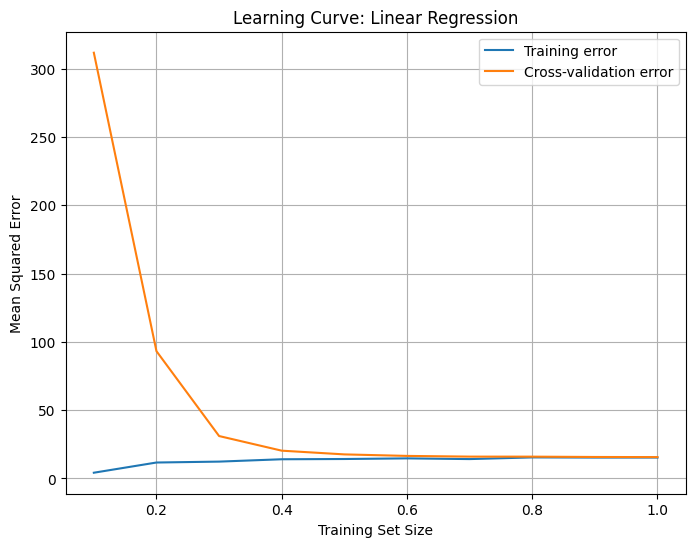

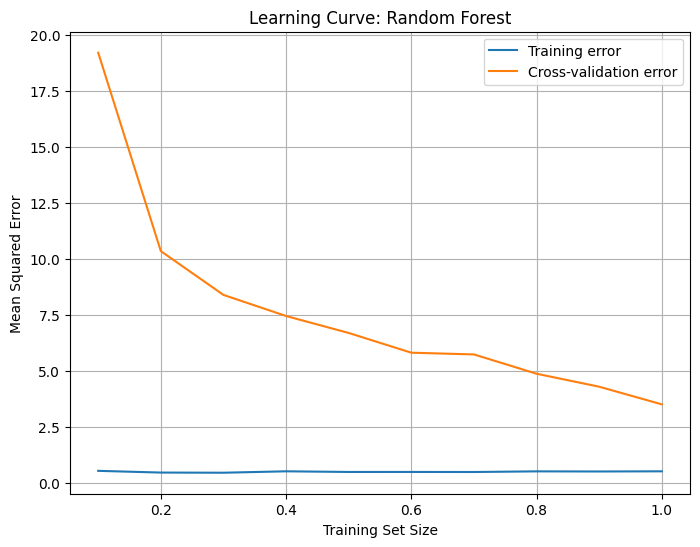

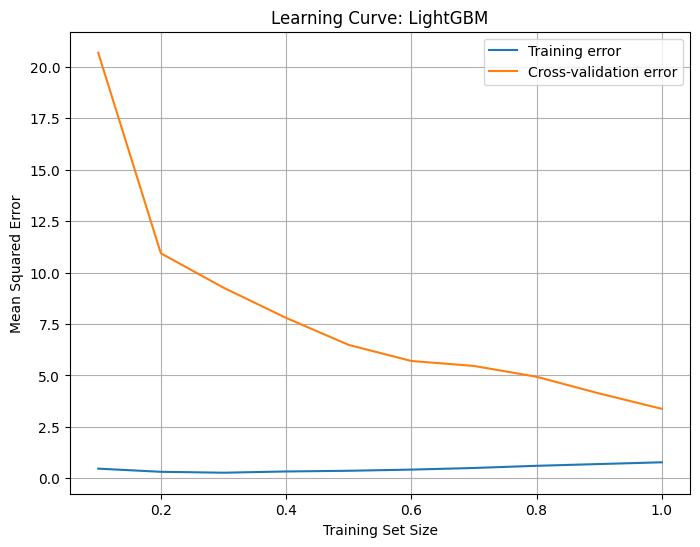

In [ ]:
# Install LightGBM if not already installed
!pip install lightgbm --quiet

# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve, KFold
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
import lightgbm as lgb
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

# Assuming 'df' is the DataFrame with the data
# Split features and target (assuming the target column is named 'target')
X = df.drop(columns=['Life expectancy'])  # Replace 'target' with the actual target column name
y = df['Life expectancy']  # Replace 'target' with the actual target column name

# Define models
models = {
    "Linear Regression": LinearRegression(),
    "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42),
    "LightGBM": lgb.LGBMRegressor(random_state=42, verbose=-1)
}

# Function to compute average learning curve using 5-fold cross-validation
def compute_learning_curve(model, X, y, cv=5):
    kf = KFold(n_splits=cv, shuffle=True, random_state=42)

    train_errors = []
    val_errors = []
    train_sizes = np.linspace(0.1, 1.0, 10)  # 10 different training set sizes

    for train_size in train_sizes:
        fold_train_errors = []
        fold_val_errors = []

        for train_index, val_index in kf.split(X):
            X_train, X_val = X.iloc[train_index], X.iloc[val_index]
            y_train, y_val = y.iloc[train_index], y.iloc[val_index]

            # Use a subset of the training set based on train_size
            subset_size = int(train_size * len(X_train))
            X_train_subset = X_train.iloc[:subset_size]
            y_train_subset = y_train.iloc[:subset_size]

            try:
                # Train the model on the subset
                model.fit(X_train_subset, y_train_subset)

                # Compute training and validation errors
                y_train_pred = model.predict(X_train_subset)
                y_val_pred = model.predict(X_val)

                fold_train_errors.append(mean_squared_error(y_train_subset, y_train_pred))
                fold_val_errors.append(mean_squared_error(y_val, y_val_pred))
            except Exception as e:
                # Suppress the error and append a large error value to avoid interruption
                print(f"Error during fold processing: {e}")
                fold_train_errors.append(np.inf)
                fold_val_errors.append(np.inf)

        # Average the errors across all folds
        train_errors.append(np.mean(fold_train_errors))
        val_errors.append(np.mean(fold_val_errors))

    return train_sizes, train_errors, val_errors

# Function to plot the learning curve
def plot_learning_curve(model_name, train_sizes, train_errors, val_errors):
    plt.figure(figsize=(8, 6))
    plt.plot(train_sizes, train_errors, label="Training error")
    plt.plot(train_sizes, val_errors, label="Cross-validation error")
    plt.title(f"Learning Curve: {model_name}")
    plt.xlabel("Training Set Size")
    plt.ylabel("Mean Squared Error")
    plt.legend()
    plt.grid()
    plt.show()

# Compute and plot learning curves for each model
for model_name, model in models.items():
    train_sizes, train_errors, val_errors = compute_learning_curve(model, X, y, cv=5)
    plot_learning_curve(model_name, train_sizes, train_errors, val_errors)

###*Using Just Two Predictors (BMI and GDP). Expecting Underfitting?*

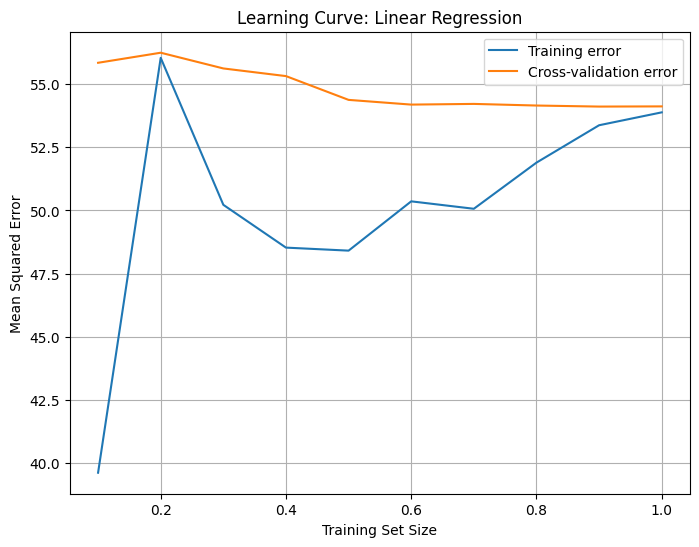

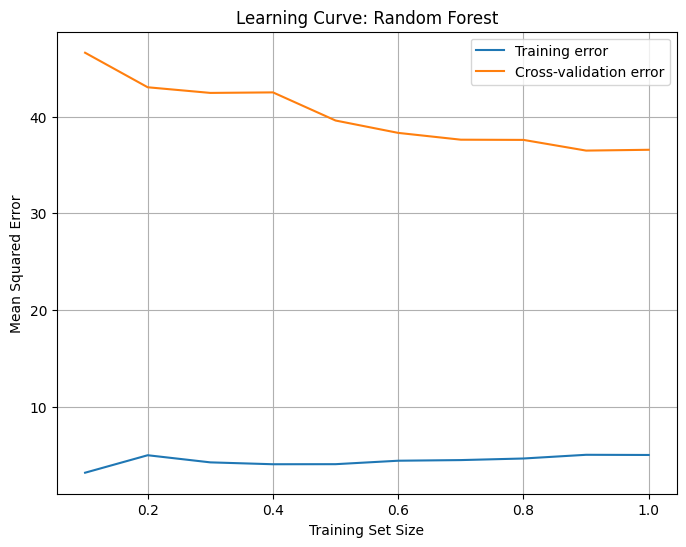

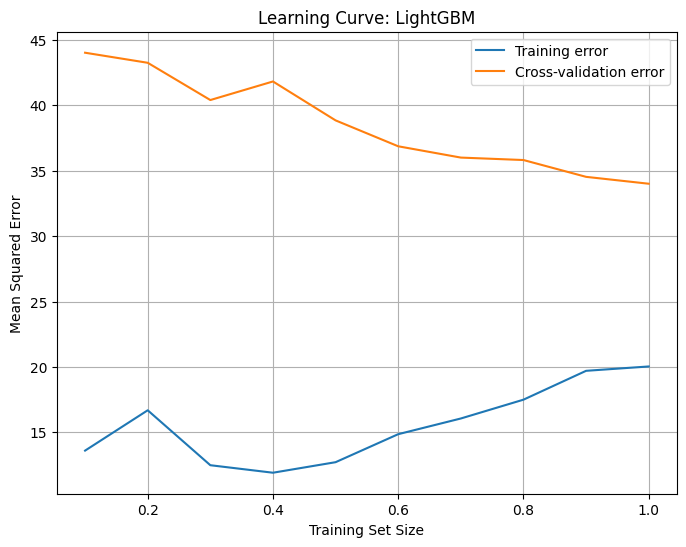

In [ ]:
# Assuming 'df' is the DataFrame with the data
# Use only 'BMI' and 'GDP' as predictors
X = df[['BMI', 'GDP']]  # Replace with actual column names if different
y = df['Life expectancy']  # Replace 'target' with the actual target column name

# Define models (with LightGBM in quiet mode)
models = {
    "Linear Regression": LinearRegression(),
    "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42),
    "LightGBM": lgb.LGBMRegressor(random_state=42, verbose=-1)  # Suppress output
}

# Function to compute average learning curve using 5-fold cross-validation
def compute_learning_curve(model, X, y, cv=5):
    kf = KFold(n_splits=cv, shuffle=True, random_state=42)

    train_errors = []
    val_errors = []
    train_sizes = np.linspace(0.1, 1.0, 10)  # 10 different training set sizes

    for train_size in train_sizes:
        fold_train_errors = []
        fold_val_errors = []

        for train_index, val_index in kf.split(X):
            X_train, X_val = X.iloc[train_index], X.iloc[val_index]
            y_train, y_val = y.iloc[train_index], y.iloc[val_index]

            # Use a subset of the training set based on train_size
            subset_size = int(train_size * len(X_train))
            X_train_subset = X_train.iloc[:subset_size]
            y_train_subset = y_train.iloc[:subset_size]

            try:
                # Train the model on the subset
                model.fit(X_train_subset, y_train_subset)

                # Compute training and validation errors
                y_train_pred = model.predict(X_train_subset)
                y_val_pred = model.predict(X_val)

                fold_train_errors.append(mean_squared_error(y_train_subset, y_train_pred))
                fold_val_errors.append(mean_squared_error(y_val, y_val_pred))
            except Exception as e:
                # Suppress the error and append a large error value to avoid interruption
                print(f"Error during fold processing: {e}")
                fold_train_errors.append(np.inf)
                fold_val_errors.append(np.inf)

        # Average the errors across all folds
        train_errors.append(np.mean(fold_train_errors))
        val_errors.append(np.mean(fold_val_errors))

    return train_sizes, train_errors, val_errors

# Function to plot the learning curve
def plot_learning_curve(model_name, train_sizes, train_errors, val_errors):
    plt.figure(figsize=(8, 6))
    plt.plot(train_sizes, train_errors, label="Training error")
    plt.plot(train_sizes, val_errors, label="Cross-validation error")
    plt.title(f"Learning Curve: {model_name}")
    plt.xlabel("Training Set Size")
    plt.ylabel("Mean Squared Error")
    plt.legend()
    plt.grid()
    plt.show()

# Compute and plot learning curves for each model
for model_name, model in models.items():
    train_sizes, train_errors, val_errors = compute_learning_curve(model, X, y, cv=5)
    plot_learning_curve(model_name, train_sizes, train_errors, val_errors)

###*Using Five Carefully-Chosen Predictors*


Random Forest Feature Importances (High to Low):
HIV/AIDS: 0.5806
Income composition of resources: 0.1871
Adult Mortality: 0.1281
Schooling: 0.0196
BMI: 0.0117
Alcohol: 0.0083
thinness 5-9 years: 0.0082
Year: 0.0067
under-five deaths: 0.0066
Total expenditure: 0.0054
infant deaths: 0.0054
thinness 1-19 years: 0.0046
Country: 0.0045
Polio: 0.0041
Measles: 0.0035
GDP: 0.0033
percentage expenditure: 0.0029
Population: 0.0028
Diphtheria: 0.0027
Hepatitis B: 0.0021
Status_encoded: 0.0019

LightGBM Feature Importances (High to Low):
Adult Mortality: 490.0000
Country: 225.0000
Alcohol: 220.0000
Income composition of resources: 210.0000
Total expenditure: 170.0000
Schooling: 157.0000
HIV/AIDS: 141.0000
thinness 5-9 years: 139.0000
Year: 139.0000
thinness 1-19 years: 133.0000
Population: 126.0000
BMI: 126.0000
GDP: 104.0000
percentage expenditure: 100.0000
under-five deaths: 97.0000
Polio: 96.0000
Measles: 87.0000
Hepatitis B: 85.0000
Diphtheria: 76.0000
infant deaths: 74.0000
Status_encoded: 

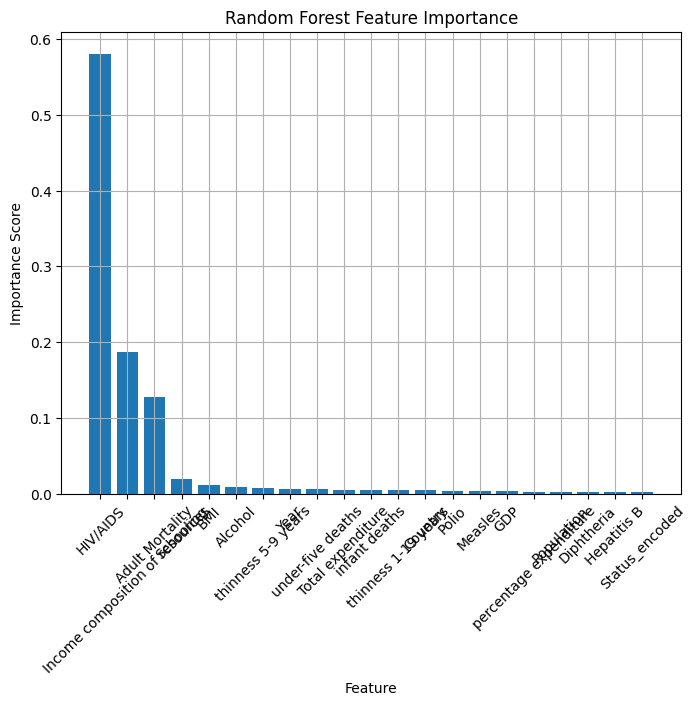

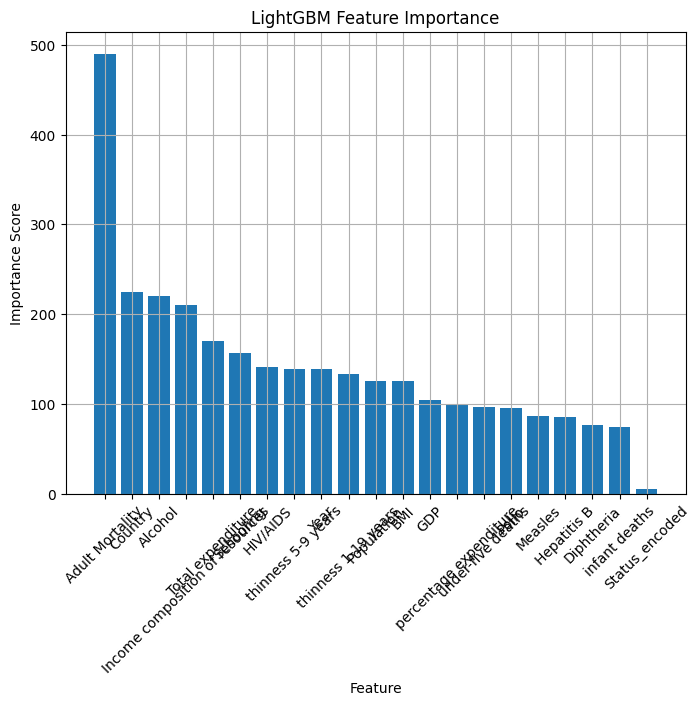

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming 'df' is the DataFrame with the data
# Split features and target (assuming the target column is named 'target')
X = df.drop(columns=['Life expectancy'])  # Replace 'target' with the actual target column name
y = df['Life expectancy']  # Replace 'target' with the actual target column name

# Train Random Forest and LightGBM models on the full dataset
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X, y)

lgb_model = lgb.LGBMRegressor(random_state=42, verbose=-1)
lgb_model.fit(X, y)

# Get feature importance
rf_importance = rf_model.feature_importances_
lgb_importance = lgb_model.feature_importances_

# Print feature importances in descending order
def print_feature_importance(importance, feature_names, model_name):
    sorted_indices = np.argsort(importance)[::-1]  # Sort indices in descending order
    print(f"\n{model_name} Feature Importances (High to Low):")
    for idx in sorted_indices:
        print(f"{feature_names[idx]}: {importance[idx]:.4f}")

print_feature_importance(rf_importance, X.columns, "Random Forest")
print_feature_importance(lgb_importance, X.columns, "LightGBM")

# Plot feature importance
def plot_feature_importance(importance, feature_names, model_name):
    plt.figure(figsize=(8, 6))
    indices = np.argsort(importance)[::-1]  # Sort features by importance
    plt.bar(range(len(feature_names)), importance[indices], align="center")
    plt.xticks(range(len(feature_names)), np.array(feature_names)[indices], rotation=45)
    plt.title(f"{model_name} Feature Importance")
    plt.xlabel("Feature")
    plt.ylabel("Importance Score")
    plt.grid()
    plt.show()

# Plot for Random Forest
plot_feature_importance(rf_importance, X.columns, "Random Forest")

# Plot for LightGBM
plot_feature_importance(lgb_importance, X.columns, "LightGBM")


###Using Predictors [HIV/AIDS, Income composition of resources, Adult Mortality, Schooling, BMI, Alcohol, thinness 5-9 years]

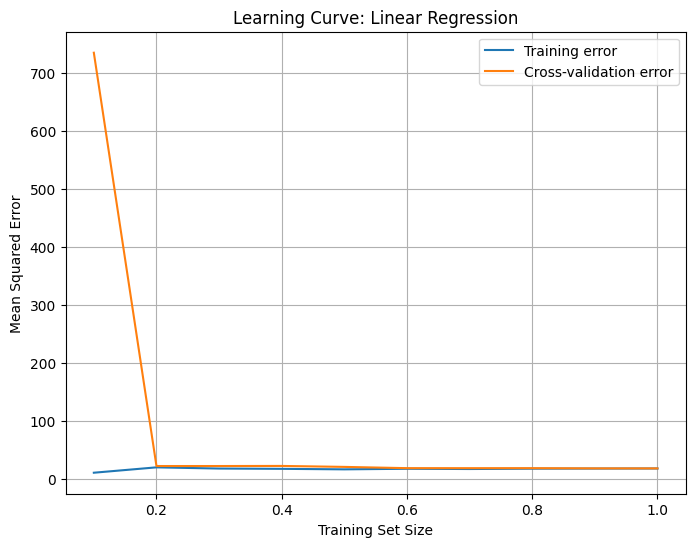

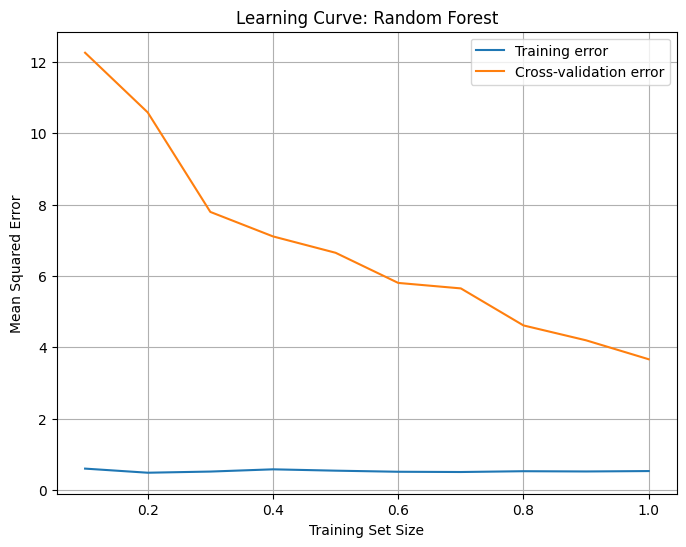

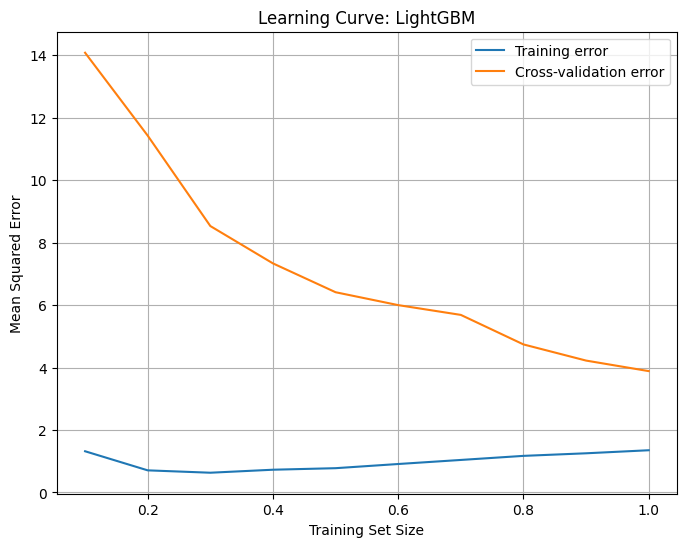

In [ ]:
# Assuming 'df' is the DataFrame with the data
# Use the indicated predictors
X = df[['HIV/AIDS', 'Income composition of resources', 'Adult Mortality', 'Schooling', 'BMI', 'Alcohol', 'thinness 5-9 years']]  # Replace with actual column names if different
y = df['Life expectancy']  # Replace 'target' with the actual target column name

# Define models (with LightGBM in quiet mode)
models = {
    "Linear Regression": LinearRegression(),
    "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42),
    "LightGBM": lgb.LGBMRegressor(random_state=42, verbose=-1)  # Suppress output
}

# Function to compute average learning curve using 5-fold cross-validation
def compute_learning_curve(model, X, y, cv=5):
    kf = KFold(n_splits=cv, shuffle=True, random_state=42)

    train_errors = []
    val_errors = []
    train_sizes = np.linspace(0.1, 1.0, 10)  # 10 different training set sizes

    for train_size in train_sizes:
        fold_train_errors = []
        fold_val_errors = []

        for train_index, val_index in kf.split(X):
            X_train, X_val = X.iloc[train_index], X.iloc[val_index]
            y_train, y_val = y.iloc[train_index], y.iloc[val_index]

            # Use a subset of the training set based on train_size
            subset_size = int(train_size * len(X_train))
            X_train_subset = X_train.iloc[:subset_size]
            y_train_subset = y_train.iloc[:subset_size]

            try:
                # Train the model on the subset
                model.fit(X_train_subset, y_train_subset)

                # Compute training and validation errors
                y_train_pred = model.predict(X_train_subset)
                y_val_pred = model.predict(X_val)

                fold_train_errors.append(mean_squared_error(y_train_subset, y_train_pred))
                fold_val_errors.append(mean_squared_error(y_val, y_val_pred))
            except Exception as e:
                # Suppress the error and append a large error value to avoid interruption
                print(f"Error during fold processing: {e}")
                fold_train_errors.append(np.inf)
                fold_val_errors.append(np.inf)

        # Average the errors across all folds
        train_errors.append(np.mean(fold_train_errors))
        val_errors.append(np.mean(fold_val_errors))

    return train_sizes, train_errors, val_errors

# Function to plot the learning curve
def plot_learning_curve(model_name, train_sizes, train_errors, val_errors):
    plt.figure(figsize=(8, 6))
    plt.plot(train_sizes, train_errors, label="Training error")
    plt.plot(train_sizes, val_errors, label="Cross-validation error")
    plt.title(f"Learning Curve: {model_name}")
    plt.xlabel("Training Set Size")
    plt.ylabel("Mean Squared Error")
    plt.legend()
    plt.grid()
    plt.show()

# Compute and plot learning curves for each model
for model_name, model in models.items():
    train_sizes, train_errors, val_errors = compute_learning_curve(model, X, y, cv=5)
    plot_learning_curve(model_name, train_sizes, train_errors, val_errors)

###Using Predictors [Adult Mortality, Country, Alcohol,Income composition of resources, Total expenditure, Schooling, HIV/AIDS]

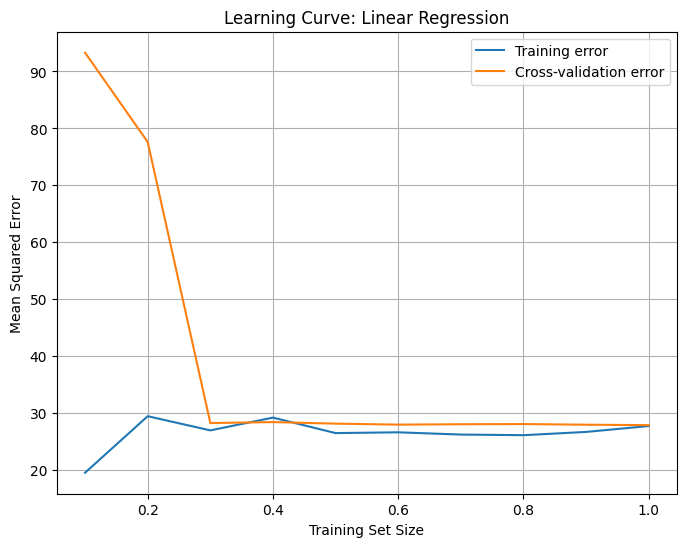

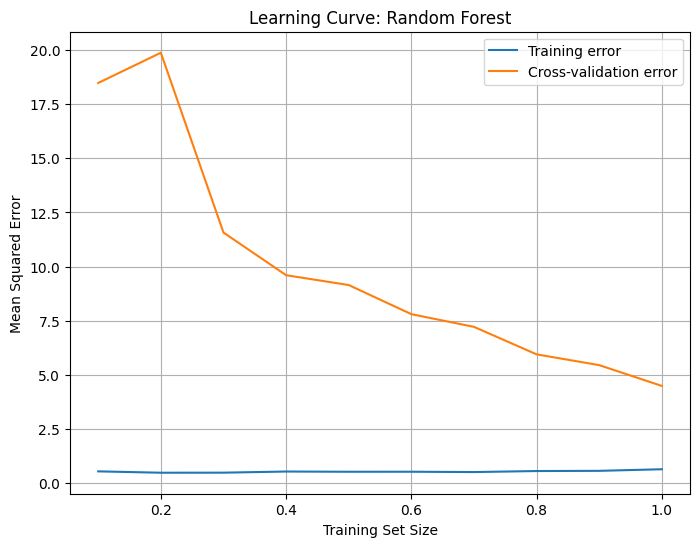

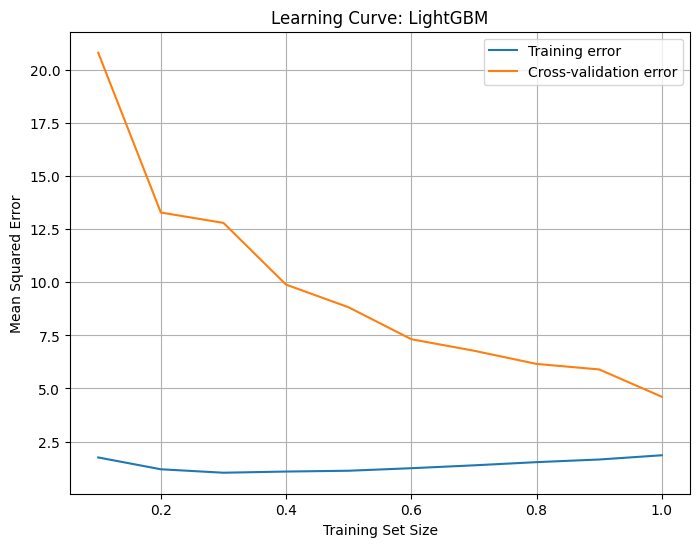

In [ ]:
# Assuming 'df' is the DataFrame with the data
# Use the indicated predictors
#X = df[['Adult Mortality', 'Country', 'Alcohol','Income composition of resources', 'Total expenditure', 'Schooling', 'HIV/AIDS']]
X = df[['Adult Mortality', 'Country', 'Alcohol','Income composition of resources']]
y = df['Life expectancy']  # Replace 'target' with the actual target column name

# Define models (with LightGBM in quiet mode)
models = {
    "Linear Regression": LinearRegression(),
    "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42),
    "LightGBM": lgb.LGBMRegressor(random_state=42, verbose=-1)  # Suppress output
}

# Function to compute average learning curve using 5-fold cross-validation
def compute_learning_curve(model, X, y, cv=5):
    kf = KFold(n_splits=cv, shuffle=True, random_state=42)

    train_errors = []
    val_errors = []
    train_sizes = np.linspace(0.1, 1.0, 10)  # 10 different training set sizes

    for train_size in train_sizes:
        fold_train_errors = []
        fold_val_errors = []

        for train_index, val_index in kf.split(X):
            X_train, X_val = X.iloc[train_index], X.iloc[val_index]
            y_train, y_val = y.iloc[train_index], y.iloc[val_index]

            # Use a subset of the training set based on train_size
            subset_size = int(train_size * len(X_train))
            X_train_subset = X_train.iloc[:subset_size]
            y_train_subset = y_train.iloc[:subset_size]

            try:
                # Train the model on the subset
                model.fit(X_train_subset, y_train_subset)

                # Compute training and validation errors
                y_train_pred = model.predict(X_train_subset)
                y_val_pred = model.predict(X_val)

                fold_train_errors.append(mean_squared_error(y_train_subset, y_train_pred))
                fold_val_errors.append(mean_squared_error(y_val, y_val_pred))
            except Exception as e:
                # Suppress the error and append a large error value to avoid interruption
                print(f"Error during fold processing: {e}")
                fold_train_errors.append(np.inf)
                fold_val_errors.append(np.inf)

        # Average the errors across all folds
        train_errors.append(np.mean(fold_train_errors))
        val_errors.append(np.mean(fold_val_errors))

    return train_sizes, train_errors, val_errors

# Function to plot the learning curve
def plot_learning_curve(model_name, train_sizes, train_errors, val_errors):
    plt.figure(figsize=(8, 6))
    plt.plot(train_sizes, train_errors, label="Training error")
    plt.plot(train_sizes, val_errors, label="Cross-validation error")
    plt.title(f"Learning Curve: {model_name}")
    plt.xlabel("Training Set Size")
    plt.ylabel("Mean Squared Error")
    plt.legend()
    plt.grid()
    plt.show()

# Compute and plot learning curves for each model
for model_name, model in models.items():
    train_sizes, train_errors, val_errors = compute_learning_curve(model, X, y, cv=5)
    plot_learning_curve(model_name, train_sizes, train_errors, val_errors)